In [2]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Rakesh Nemu
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt


# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


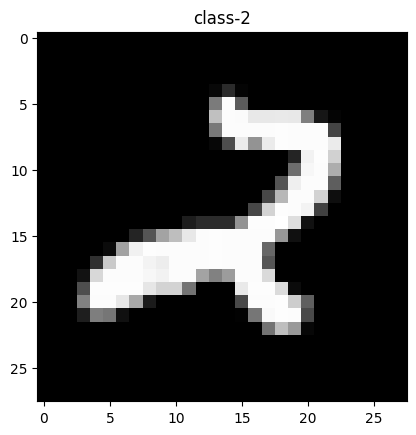

Train image 5677-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8  43   4   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 123 252  91   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 192 252 251 232 232
  233 232 127  22   4   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 122 252 252 252 252
  253 252 252 252  68   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   

In [3]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/rakeshnemu/Documents/python/knn/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [4]:
# Your validation set extraction script/code 
train_images=train_images.flatten().reshape((train_images.shape[0],train_images.shape[1]*train_images.shape[2])).astype(np.float64)
test_images=test_images.flatten().reshape((test_images.shape[0],test_images.shape[1]*test_images.shape[2])).astype(np.float64)

ratio=.2
c=int(train_images.shape[0]*ratio)
x_val=train_images[:c,:]
x_train=train_images[c:,:]
y_val=train_labels[:c]
y_train=train_labels[c:]


# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

Your k-NN algorithm script/code 
Distance Metric is Euclidean Distance

In [5]:
def distance_(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        distance_matrix[i] = distances
    idx = np.argsort(distance_matrix,axis=1)
    return idx

def knn_model(x_train, y_train, x_test,k,idx):
    pred=np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        k_nearest_labels = y_train[idx[i][:k]]
        pred[i]=np.bincount(k_nearest_labels).argmax()
    
    return pred    

In [6]:
acc1={}
dist = distance_(x_train, x_val)

for k in range(1,23,2):
    p=knn_model(x_train,y_train,x_val,k,dist)
    accuracy=np.mean(p==y_val)
    acc1[k]=accuracy
    print(f"for {k} accuracy={accuracy}")

for 1 accuracy=0.97
for 3 accuracy=0.97175
for 5 accuracy=0.96975
for 7 accuracy=0.9680833333333333
for 9 accuracy=0.9655833333333333
for 11 accuracy=0.9646666666666667
for 13 accuracy=0.9635833333333333
for 15 accuracy=0.962
for 17 accuracy=0.9608333333333333
for 19 accuracy=0.9596666666666667
for 21 accuracy=0.9591666666666666


Distance Metric is Manhaten Distance

In [7]:

def distance_2(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.sum(np.abs(X_train - test_point), axis=1)
        distance_matrix[i] = distances
    idx = np.argsort(distance_matrix,axis=1)
    return idx

def knn_model(x_train, y_train, x_test,k,idx):
    pred=np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        k_nearest_labels = y_train[idx[i][:k]]
        pred[i]=np.bincount(k_nearest_labels).argmax()
    return pred    

In [8]:
acc2={}
dist = distance_2(x_train, x_val)
for k in range(1,23,2):
    p=knn_model(x_train,y_train,x_val,k,dist)
    accuracy=np.mean(p==y_val)
    acc2[k]=accuracy
    print(f"for {k} accuracy={accuracy}")

for 1 accuracy=0.963
for 3 accuracy=0.96475
for 5 accuracy=0.9635
for 7 accuracy=0.9625
for 9 accuracy=0.9596666666666667
for 11 accuracy=0.957
for 13 accuracy=0.9565
for 15 accuracy=0.95525
for 17 accuracy=0.9545
for 19 accuracy=0.95175
for 21 accuracy=0.9511666666666667


Distance Metric is Chebyshev Distance

In [9]:
# Your k-NN algorithm script/code 
def distance_3(X_train, X_test):
    distance_matrix = np.zeros((len(X_test), len(X_train)))
    for i, test_point in enumerate(X_test):
        distances = np.max(np.abs(X_train - test_point), axis=1)
        distance_matrix[i] = distances
    idx = np.argsort(distance_matrix,axis=1)
    return idx
def knn_model(x_train, y_train, x_test,k,idx):
    pred=np.zeros(x_test.shape[0])
    for i in range(x_test.shape[0]):
        k_nearest_labels = y_train[idx[i][:k]]
        pred[i]=np.bincount(k_nearest_labels).argmax()
    
    return pred    

In [10]:
acc3={}
dist = distance_3(x_train, x_val)
for k in range(1,23,2):
    p=knn_model(x_train,y_train,x_val,k,dist)
    accuracy=np.mean(p==y_val)
    acc3[k]=accuracy
    print(f"for {k} accuracy={accuracy}")

for 1 accuracy=0.81375
for 3 accuracy=0.7978333333333333
for 5 accuracy=0.8035833333333333
for 7 accuracy=0.7975
for 9 accuracy=0.7913333333333333
for 11 accuracy=0.79125
for 13 accuracy=0.7889166666666667
for 15 accuracy=0.7894166666666667
for 17 accuracy=0.7879166666666667
for 19 accuracy=0.7819166666666667
for 21 accuracy=0.7793333333333333


Check Accuracy of the model

In [11]:
x_test=test_images
y_test=test_labels

In [56]:
dist1 = distance_(train_images, x_test)


In [57]:
p=knn_model(train_images,train_labels,x_test,3,dist1)
accuracy=np.mean(p==y_test)
print(f"for k=3  for l2 norm accuracy={accuracy}")

for k=3  for l2 norm accuracy=0.9705


In [28]:
Acc_mattrix=np.array([list(acc1.values()),list(acc2.values()),list(acc3.values())]).T

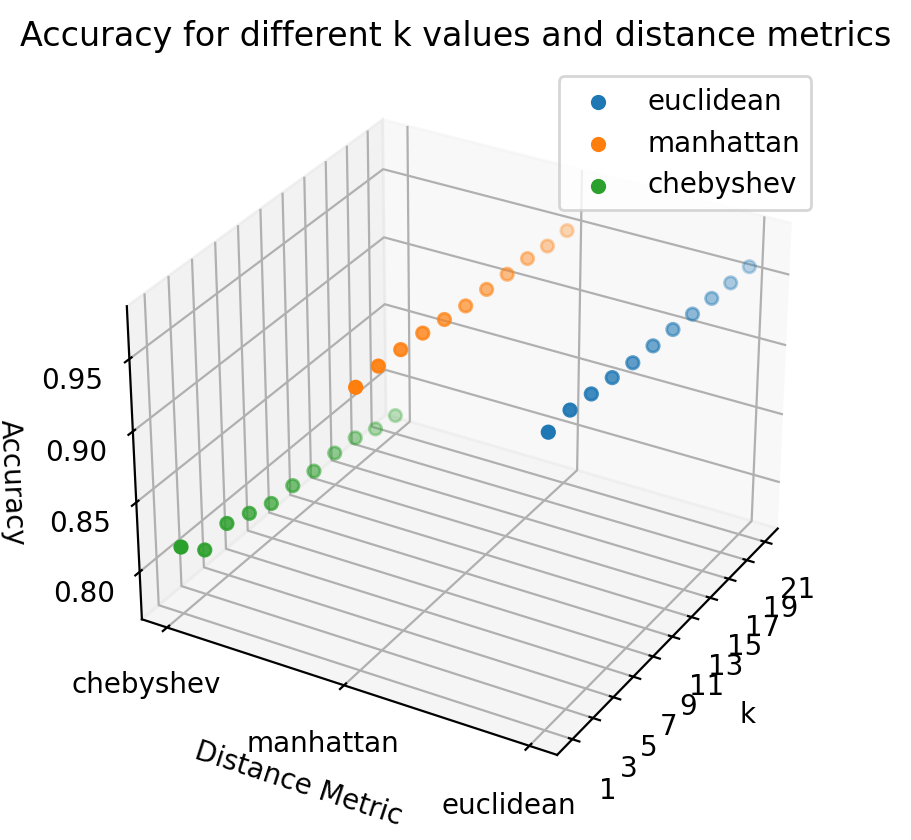

In [54]:
k_values = [i for i in range(1,23,2)]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
accuracy_data = Acc_mattrix
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
for i, metric in enumerate(distance_metrics):
    x = np.arange(len(k_values))
    y = np.full(len(k_values), i)
    z = accuracy_data[:, i]
    ax.scatter(x, y, z, label=metric)
ax.set_xticks(np.arange(len(k_values)))
ax.set_xticklabels(k_values)
ax.set_yticks(np.arange(len(distance_metrics)))
ax.set_yticklabels(distance_metrics)
ax.set_xlabel('k')
ax.set_ylabel('Distance Metric')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy for different k values and distance metrics')
ax.view_init(30, 210)
ax.legend()
plt.show()
